In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# 轉換日期
def dtype_compressor(df):
  #object 
  # when unique ratio > 0.5, catogory stands less memory than object
  converted_obj = pd.DataFrame()
  df_obj = df.select_dtypes(include=['object'])
  for col in df_obj.columns:
    converted_obj.loc[:,col] = df_obj.loc[:,col].astype('category')

  # numbers
  df_down_num = pd.DataFrame()
  df_num = df.select_dtypes(include=['number'])
  for col in df_num.columns:
    df_down_num.loc[:,col] = pd.to_numeric(df_num.loc[:,col],downcast='signed')

  # merge
  df = pd.concat([converted_obj,df_down_num],axis=1)
  
  del converted_obj, df_obj, df_down_num, df_num  
  
  return df

In [3]:
def fast_datetime(s):
    dates = {date:pd.to_datetime(date,format='%Y%m%d') for date in s.unique()}
    return s.map(dates)

### Training Set
* 資料檔：train.csv&train_v2(說明：the train set, containing the user ids and whether they have churned.)

In [4]:
'''
kk_train01 = pd.read_csv("train.csv")
kk_train02 = pd.read_csv("train_v2.csv")
'''

In [5]:
# kk_train = pd.concat([kk_train01, kk_train02], axis=0)

In [6]:
'''
print(kk_train.shape)
kk_train.head()
'''

(1963891, 2)


,msno,is_churn
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1


### 客戶資料
* **資料檔：members.csv(說明：user information. Note that not every user in the dataset is available.)**

In [7]:
# kk_members = pd.read_csv("members_v3.csv")

In [8]:
'''
print(kk_members.shape)
kk_members.head()
'''

(6769473, 6)


,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915


### 交易資料
* **資料檔：transactions.csv(說明：transactions of users up until 2/28/2017.)**

In [9]:
# kk_transac01 = pd.read_csv("transactions.csv")
# kk_transac02 = pd.read_csv("transactions_v2.csv")

In [10]:
# 合併
# kk_transaction = pd.concat([kk_transac01, kk_transac02], axis=0)

In [11]:
'''
# rename the columns
date_rename = {'transaction_date':'trans_date', 'membership_expire_date':'mem_expire_date'}
kk_transaction.rename(columns=date_rename,inplace=True)

# converting
kk_transaction = dtype_compressor(kk_transaction)

d = ['trans_date', 'mem_expire_date']
for col in d:
  kk_transaction[col] = fast_datetime(kk_transaction[col])
'''

In [12]:
# print(kk_transaction.shape)
# kk_transaction.head()

(22978755, 9)


,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,trans_date,mem_expire_date,is_cancel
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,2015-09-30,2015-11-01,0
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,2015-09-30,2015-10-31,0
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,129,129,1,2015-09-30,2016-04-27,0
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,1,2015-09-30,2015-11-28,0
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,1,2015-09-30,2015-11-21,0


### 合併TrainingSet & Members

In [13]:
# TrainingData = pd.merge(kk_train, kk_members, how="left", on="msno")

In [14]:
# print(TrainingData.shape)
# TrainingData.head()

(1963891, 7)


,msno,is_churn,city,bd,gender,registered_via,registration_init_time
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18.0,36.0,female,9.0,20050406.0
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,10.0,38.0,male,9.0,20050407.0
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,11.0,27.0,female,9.0,20051016.0
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,13.0,23.0,female,9.0,20051102.0
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,3.0,27.0,male,9.0,20051228.0


### 合併Trainsaction相同user_id

In [15]:
# Transaction = kk_transaction.groupby(by='msno')['payment_plan_days','plan_list_price','is_auto_renew','is_cancel'].sum()

In [16]:
# print(Transaction.shape)
# Transaction.head()

(2426143, 4)


,payment_plan_days,plan_list_price,is_auto_renew,is_cancel
msno,,,,
+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,7.0,0.0,0,0
+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,805.0,3387.0,0,0
+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,150.0,495.0,5,0
+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,603.0,2980.0,21,0
+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,780.0,3874.0,27,0


### 合併TrainingData & Transactions

In [17]:
# TrainingData = pd.merge(left=TrainingData, right=Transaction ,how='left',on=['msno'])

In [18]:
'''
print(TrainingData.shape)
TrainingData.head()
'''

(1963891, 11)


,msno,is_churn,city,bd,gender,registered_via,registration_init_time,payment_plan_days,plan_list_price,is_auto_renew,is_cancel
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18.0,36.0,female,9.0,20050406.0,37.0,149.0,0,0
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,10.0,38.0,male,9.0,20050407.0,663.0,3309.0,22,2
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,11.0,27.0,female,9.0,20051016.0,300.0,1492.0,8,1
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,13.0,23.0,female,9.0,20051102.0,850.0,1937.0,1,0
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,3.0,27.0,male,9.0,20051228.0,875.0,4053.0,0,0


### 置換缺失值

In [19]:
'''
# 城市缺失值置換成-1
TrainingData["city"] = TrainingData.city.fillna(-1)
# 年齡缺失值置換成-1
TrainingData["bd"] = TrainingData.bd.fillna(-1)
# 註冊時間以datetime型態顯示
TrainingData['registration_init_time'] = TrainingData.registration_init_time.apply(lambda x: datetime.strptime(str(int(x)), "%Y%m%d").date() if pd.notnull(x) else "NAN" )
# 性別置換為男->1, 女->2
TrainingData["gender"] = TrainingData.gender.fillna(-1)
TrainingData["gender"].replace("male", 1, inplace=True)
TrainingData["gender"].replace("female", 2, inplace=True)
# 註冊方式缺失值置換成-1
TrainingData["registered_via"] = TrainingData.registered_via.fillna(-1)
'''

In [20]:
'''
TrainingData.rename(columns={'payment_plan_days':'total_paymentDays', 'plan_list_price':'totalPrice'},inplace=True)
TrainingData.head()
'''

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,total_paymentDays,totalPrice,is_auto_renew,is_cancel
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18.0,36.0,2,9.0,2005-04-06,37.0,149.0,0,0
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,10.0,38.0,1,9.0,2005-04-07,663.0,3309.0,22,2
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,11.0,27.0,2,9.0,2005-10-16,300.0,1492.0,8,1
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,13.0,23.0,2,9.0,2005-11-02,850.0,1937.0,1,0
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,3.0,27.0,1,9.0,2005-12-28,875.0,4053.0,0,0


In [21]:
# 存成csv
# TrainingData.to_csv('TrainingData.csv',index=False,header=True)

In [23]:
# 讀出TrainingData
TrainingData = pd.read_csv('TrainingData.csv')

In [24]:
TrainingData.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,total_paymentDays,totalPrice,is_auto_renew,is_cancel
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18.0,36.0,2,9.0,2005-04-06,37.0,149.0,0,0
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,10.0,38.0,1,9.0,2005-04-07,663.0,3309.0,22,2
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,11.0,27.0,2,9.0,2005-10-16,300.0,1492.0,8,1
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,13.0,23.0,2,9.0,2005-11-02,850.0,1937.0,1,0
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,3.0,27.0,1,9.0,2005-12-28,875.0,4053.0,0,0


### 切割訓練集與驗證集

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = TrainingData.iloc[:, [2,3,4,5,7,8,9,10]].values
y = TrainingData.iloc[:, 1].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Model01_Try(Tree)

In [28]:
from sklearn import tree

In [29]:
TreeClassifier = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=5)

In [30]:
TreeClassifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [55]:
dot_data = \
    tree.export_graphviz(
        TreeClassifier,
        out_file = None,
#         feature_names= TrainingData.columns,
        filled = True,
        impurity = False,
        rounded = True
    )

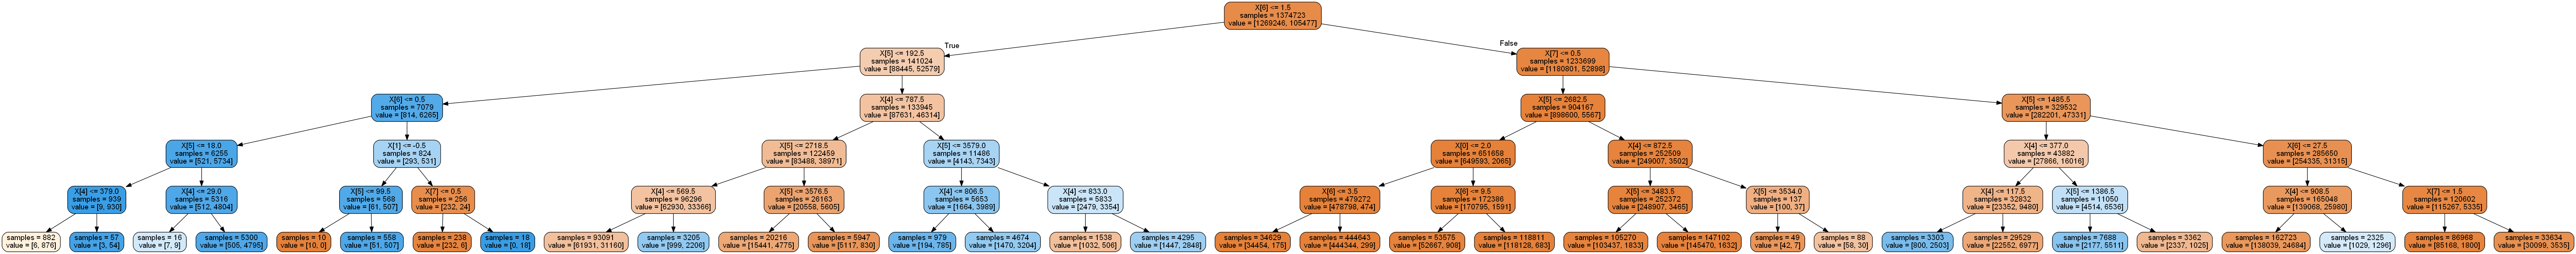

In [32]:
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.get_nodes()[7].set_fillcolor("#FFF2DD")
from IPython.display import Image
Image(graph.create_png())

### Model02_Try(Random Forest)

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
RFClassifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)

In [35]:
# 訓練模型
RFClassifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [36]:
RFClassifier.score(X=X_train, y=y_train)

0.9674959973754713

In [37]:
# 預測模型
y_predRF = RFClassifier.predict(X_test)

In [38]:
# 混淆矩陣
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predRF)
cm

array([[530815,  13029],
       [ 24943,  20381]], dtype=int64)

In [39]:
from sklearn import metrics
report = metrics.classification_report(y_test, y_predRF)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    543844
           1       0.61      0.45      0.52     45324

   micro avg       0.94      0.94      0.94    589168
   macro avg       0.78      0.71      0.74    589168
weighted avg       0.93      0.94      0.93    589168



In [40]:
# 精準率
print(metrics.accuracy_score(y_test, y_predRF))
# 預測為正，實際為正
print(metrics.precision_score(y_test, y_predRF))
# 實際為正，預測為正
print(metrics.recall_score(y_test, y_predRF))

0.9355497922494094
0.6100269380425023
0.4496734621833907


### Model03_Try(LinearSVC)

In [56]:
from sklearn.svm import LinearSVC

In [57]:
SVC1 = LinearSVC(random_state=555)

In [58]:
SVC1.fit(X=X_train, y=y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=555, tol=0.0001,
     verbose=0)

In [59]:
SVC1.score(X=X_train, y=y_train)

0.9272173376018296

In [60]:
y_predSVC1 = SVC1.predict(X_test)

In [61]:
cm1 = confusion_matrix(y_test, y_predSVC1)
cm1

array([[543419,    425],
       [ 42641,   2683]], dtype=int64)

In [62]:
report1 = metrics.classification_report(y_test, y_predSVC1)
print(report1)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96    543844
           1       0.86      0.06      0.11     45324

   micro avg       0.93      0.93      0.93    589168
   macro avg       0.90      0.53      0.54    589168
weighted avg       0.92      0.93      0.90    589168



In [63]:
# 精準率
print(metrics.accuracy_score(y_test, y_predSVC1))
# 預測為正，實際為正
print(metrics.precision_score(y_test, y_predSVC1))
# 實際為正，預測為正
print(metrics.recall_score(y_test, y_predSVC1))

0.926903701490916
0.8632561132561133
0.05919601094342953


In [64]:
score_y1 = SVC1.decision_function(X_test)

In [65]:
# TPR, FPR
n_classes = 2
linear_svc = pd.DataFrame()
# rbf_svc = pd.DataFrame()
for i in range(n_classes):
    fpr = "fpr_cls_{}".format(i)
    tpr = "tpr_cls_{}".format(i)
    linear_svc[fpr], linear_svc[tpr], _ = metrics.roc_curve(y_test, score_y1)

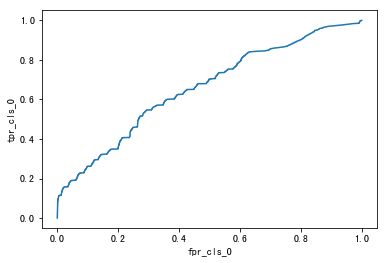

In [66]:
# ROC Curve
sns.lineplot(x="fpr_cls_0", y="tpr_cls_0", data=linear_svc)

In [67]:
print(metrics.auc(linear_svc["fpr_cls_0"], linear_svc["tpr_cls_0"]))
print(metrics.auc(linear_svc["fpr_cls_1"], linear_svc["tpr_cls_1"]))

0.6579332886455442
0.6579332886455442
